# Gradient Boost (Bike Sharing) - Regression
[ch4-gradient-boosting.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch4-gradient-boosting.ipynb)

In [2]:
import pandas as pd
import numpy as np

df_bikes = pd.read_csv('https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter04/bike_rentals_cleaned.csv')

In [3]:
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [4]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    float64
 2   yr          731 non-null    float64
 3   mnth        731 non-null    float64
 4   holiday     731 non-null    float64
 5   weekday     731 non-null    float64
 6   workingday  731 non-null    float64
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  cnt         731 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 74.4 KB


### Split Train/Test dataset

In [5]:
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

### Gradient Boosting Regressor

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [14]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=2, learning_rate=1.0)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mrse = mean_squared_error(y_test, y_pred)**0.5

print('RMSE: {:.3f}'.format(mrse))

RMSE: 911.048


In [15]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mrse = mean_squared_error(y_test, y_pred)**0.5

print('RMSE: {:.3f}'.format(mrse))

RMSE: 653.746


### learning_rate

In [17]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
for value in learning_rate_values:
    gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, 
                                    random_state=2, learning_rate=value)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    print('Learning rate:', value, ', RMSE:', rmse)

Learning rate: 0.001 , RMSE: 1633.0261400367258
Learning rate: 0.01 , RMSE: 831.5430182728547
Learning rate: 0.05 , RMSE: 685.0192988749717
Learning rate: 0.1 , RMSE: 653.7456840231495
Learning rate: 0.15 , RMSE: 687.666134269379
Learning rate: 0.2 , RMSE: 664.312804425697
Learning rate: 0.3 , RMSE: 689.4190385930236
Learning rate: 0.5 , RMSE: 693.8856905068778
Learning rate: 1.0 , RMSE: 936.3617413678853


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

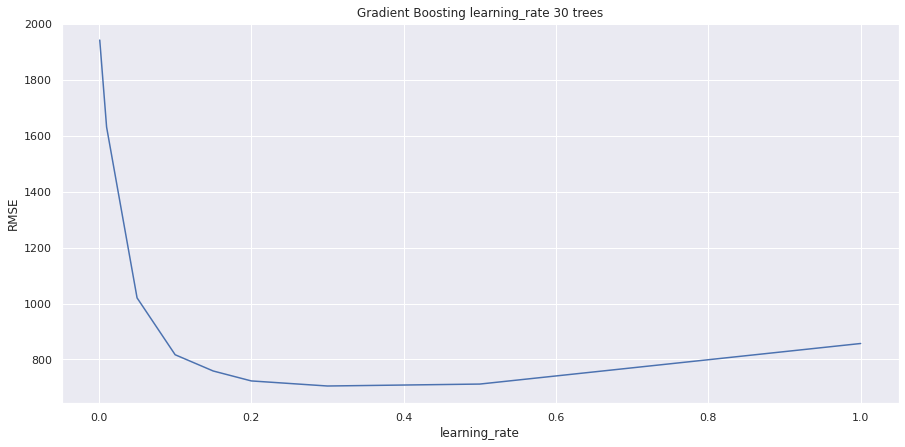

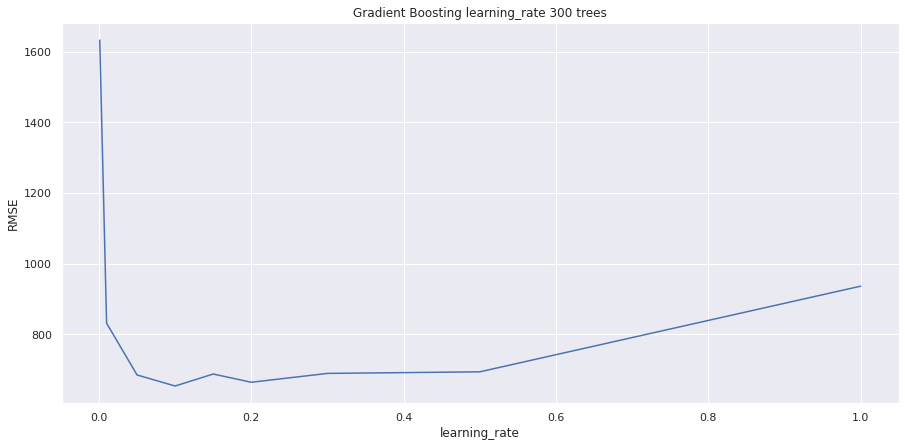

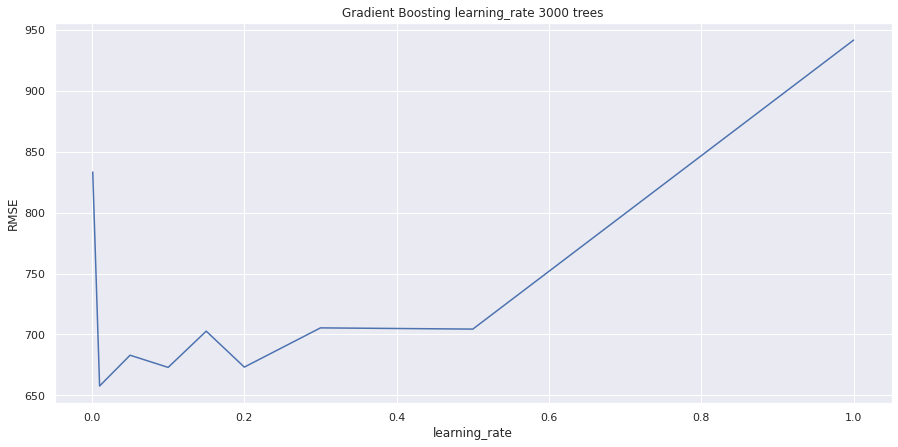

In [19]:
from sklearn.metrics import mean_squared_error

for est in [30, 300, 3000]:
    rmse_scores = []
    for value in learning_rate_values:
        gbr = GradientBoostingRegressor(max_depth=2, n_estimators=est, 
                                        random_state=2, learning_rate=value)
        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        rmse_scores.append(rmse)
    plt.figure(figsize=(15,7))
    plt.plot(learning_rate_values, rmse_scores)
    plt.xlabel('learning_rate')
    plt.ylabel('RMSE')
    plt.title('Gradient Boosting learning_rate {} trees'.format(est))
    plt.show()

### Basic Learner

In [21]:
depths = [None, 1, 2, 3, 4]
for depth in depths:
    gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=300, 
                                    random_state=2)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    print('Max depth:', depth, ', RMSE:', rmse)

Max depth: None , RMSE: 869.2788645118395
Max depth: 1 , RMSE: 707.8261886858736
Max depth: 2 , RMSE: 653.7456840231495
Max depth: 3 , RMSE: 646.4045923317708
Max depth: 4 , RMSE: 663.048387855927


In [22]:
gbr.init_

DummyRegressor()

In [23]:
len(gbr.estimators_)

300

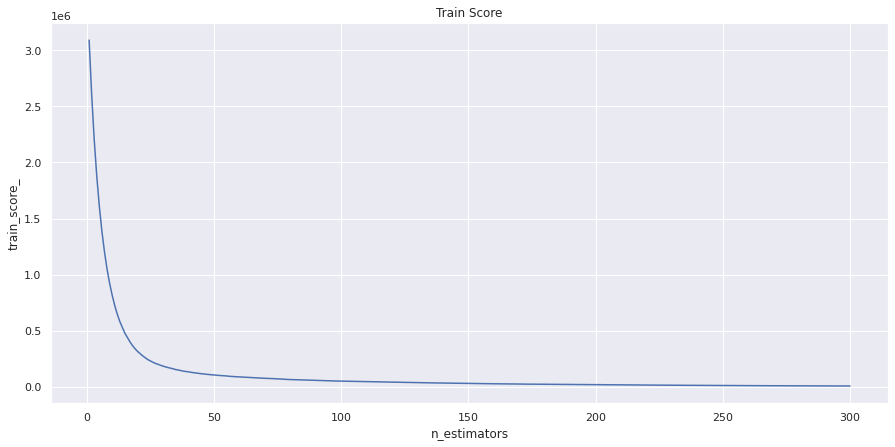

In [24]:
plt.figure(figsize=(15,7))
plt.plot(range(1, 301), gbr.train_score_)
plt.xlabel('n_estimators')
plt.ylabel('train_score_')
plt.title('Train Score')
plt.show()

### subsample

In [26]:
samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
for sample in samples:
    gbr = GradientBoostingRegressor(max_depth=3, n_estimators=300, 
                                    subsample=sample, random_state=2)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    print('subsample:', sample, ', 점수:', rmse)

subsample: 1 , 점수: 646.4045923317708
subsample: 0.9 , 점수: 620.1819001443569
subsample: 0.8 , 점수: 617.2355650565677
subsample: 0.7 , 점수: 612.9879156983139
subsample: 0.6 , 점수: 622.6385116402317
subsample: 0.5 , 점수: 626.9974073227554


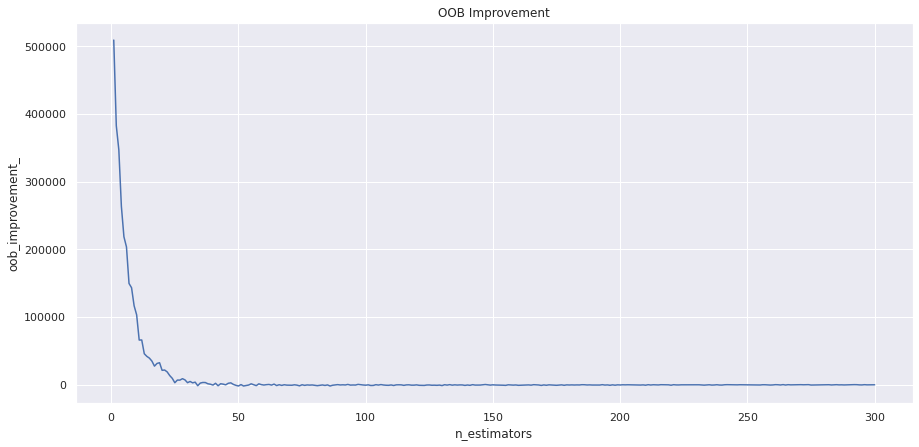

In [27]:
plt.figure(figsize=(15,7))
plt.plot(range(1, 301), gbr.oob_improvement_)
plt.xlabel('n_estimators')
plt.ylabel('oob_improvement_')
plt.title('OOB Improvement')
plt.show()

### RandomizedSearchCV

In [29]:
params = {'subsample':[0.65, 0.7, 0.75],
          'n_estimators':[300, 500, 1000],
          'learning_rate':[0.05, 0.075, 0.1]}

from sklearn.model_selection import RandomizedSearchCV

gbr = GradientBoostingRegressor(max_depth=3, random_state=2)

rand_reg = RandomizedSearchCV(gbr, params, n_iter=10, 
                              scoring='neg_mean_squared_error', 
                              cv=5, n_jobs=-1, random_state=2)

rand_reg.fit(X_train, y_train)

best_model = rand_reg.best_estimator_

best_params = rand_reg.best_params_
print("Best paramter:", best_params)

best_score = np.sqrt(-rand_reg.best_score_)
print("Best score: {:.3f}".format(best_score))

y_pred = best_model.predict(X_test)

rmse_test = mean_squared_error(y_test, y_pred)**0.5
print('Avg. RMSE: {:.3f}'.format(rmse_test))

Best paramter: {'subsample': 0.65, 'n_estimators': 300, 'learning_rate': 0.05}
Best score: 636.200
Avg. RMSE: 625.985


In [31]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=1600, 
                                subsample=0.75, learning_rate=0.02, 
                                random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mrse = mean_squared_error(y_test, y_pred)**0.5

print('RMSE: {:.3f}'.format(mrse))

RMSE: 596.954
